## Modeling
In this notebook, I experiment with various classification models and measure their performance based on accuracy and sensitivity. Given the nature of the topic, I want to make sure that I mitigate false negatives as much as possible. In this case, false negatives are cases where the patient has a heart disease but predicted as no heart disease.

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('./heart_modified.csv')
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,0,...,0,1,0,0,0,1,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   sex        1025 non-null   int64  
 2   trestbps   1025 non-null   int64  
 3   chol       1025 non-null   int64  
 4   fbs        1025 non-null   int64  
 5   thalach    1025 non-null   int64  
 6   exang      1025 non-null   int64  
 7   oldpeak    1025 non-null   float64
 8   target     1025 non-null   int64  
 9   cp_1       1025 non-null   int64  
 10  cp_2       1025 non-null   int64  
 11  cp_3       1025 non-null   int64  
 12  restecg_1  1025 non-null   int64  
 13  restecg_2  1025 non-null   int64  
 14  slope_1    1025 non-null   int64  
 15  slope_2    1025 non-null   int64  
 16  ca_1       1025 non-null   int64  
 17  ca_2       1025 non-null   int64  
 18  ca_3       1025 non-null   int64  
 19  ca_4       1025 non-null   int64  
 20  thal_1  

## Train/Test Split

In [4]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Logistic Regression

In [5]:
pipe_log = Pipeline([
    ('ss', StandardScaler()),
    ('log', LogisticRegression())
])

In [7]:
pipe_log.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('log', LogisticRegression())],
 'verbose': False,
 'ss': StandardScaler(),
 'log': LogisticRegression(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': None,
 'log__max_iter': 100,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'l2',
 'log__random_state': None,
 'log__solver': 'lbfgs',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

In [11]:
log_params = {
    'log__C' :[0.001, 0.01, 0.1, 1, 10],
    'log__penalty': ['l1', 'l2'],
    'log__solver' : ['liblinear']
}

In [12]:
gs_log = GridSearchCV(pipe_log, param_grid=log_params, cv=5, verbose=0)
gs_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('log', LogisticRegression())]),
             param_grid={'log__C': [0.001, 0.01, 0.1, 1, 10],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear']})

In [13]:
gs_log.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'liblinear'}

In [15]:
gs_log.best_score_

0.8731707317073172

In [16]:
gs_log.score(X_train, y_train)

0.8792682926829268

In [17]:
gs_log.score(X_test, y_test)

0.8634146341463415

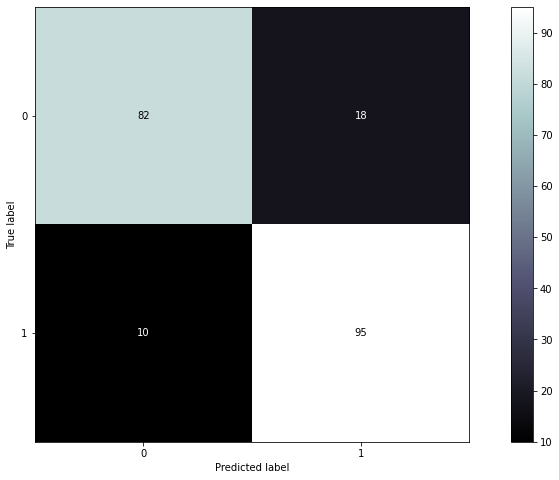

In [32]:
fig, ax = plt.subplots(figsize=(15,8))
metrics.plot_confusion_matrix(gs_log, X_test, y_test, cmap='bone', ax=ax);

In [24]:
print(metrics.classification_report(y_test, gs_log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       100
           1       0.84      0.90      0.87       105

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



---

## KNN

In [33]:
pipe_knn = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [34]:
pipe_knn.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'ss': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [35]:
knn_params = {
    'knn__p' : [1, 2],
    'knn__weights' : ['uniform', 'distance'],
    'knn__n_neighbors' : [3, 5, 7, 9, 11, 13, 15]
}

In [36]:
gs_knn = GridSearchCV(pipe_knn, param_grid=knn_params, cv=5, verbose=0)
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']})

In [37]:
gs_knn.best_params_

{'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}

In [38]:
gs_knn.best_score_

0.9914634146341464

In [39]:
gs_knn.score(X_train, y_train)

1.0

In [40]:
gs_knn.score(X_test, y_test)

1.0

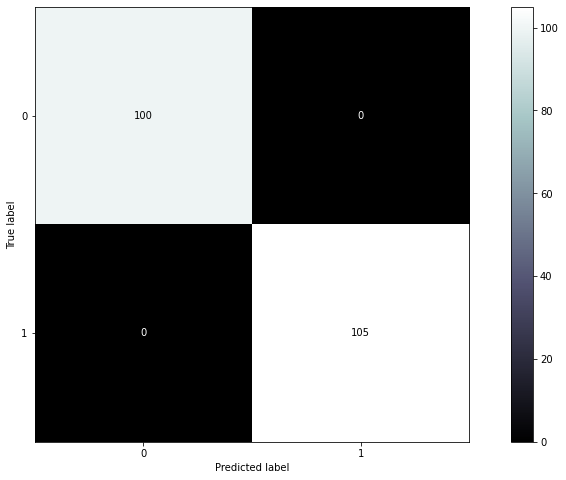

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
metrics.plot_confusion_matrix(gs_knn, X_test, y_test, cmap='bone', ax=ax);

In [42]:
print(metrics.classification_report(y_test, gs_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



---

## Random Forest

In [43]:
rf = RandomForestClassifier()

In [44]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
rf_params = {
    'ccp_alpha' : [0.001, 0.01, 0.1, 1, 10],
    'max_depth' : [2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5],
    'n_estimators' : [100, 200, 300]
}

In [46]:
gs_rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=0)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [47]:
gs_rf.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [48]:
gs_rf.best_score_

0.9085365853658537

In [49]:
gs_rf.score(X_train, y_train)

0.9365853658536586

In [50]:
gs_rf.score(X_test, y_test)

0.9121951219512195

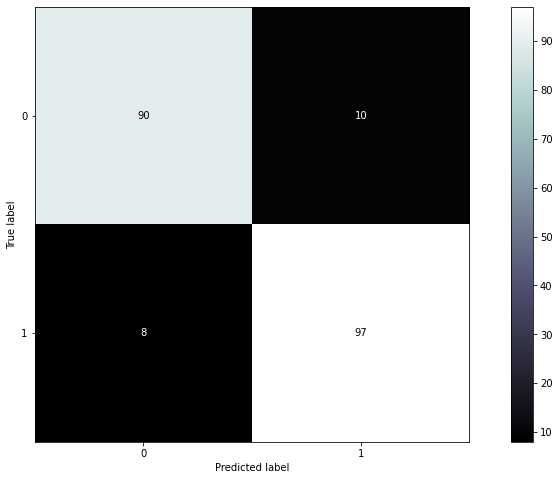

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
metrics.plot_confusion_matrix(gs_rf, X_test, y_test, cmap='bone', ax=ax);

In [52]:
print(metrics.classification_report(y_test, gs_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       100
           1       0.91      0.92      0.92       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



___

## SVC

In [6]:
pipe_svc = Pipeline([
    ('ss', StandardScaler()),
    ('svc', SVC())
])

In [7]:
pipe_svc.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'ss': StandardScaler(),
 'svc': SVC(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [8]:
svc_params = {
    'svc__C' : [0.001, 0.01, 0.1, 1, 10],
    'svc__degree' : [2, 3]
}

In [9]:
gs_svc = GridSearchCV(pipe_svc, param_grid=svc_params, cv=5, verbose=0)

gs_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__degree': [2, 3]})

In [10]:
gs_svc.best_params_

{'svc__C': 10, 'svc__degree': 2}

In [11]:
gs_svc.best_score_

0.9634146341463415

In [12]:
gs_svc.score(X_train, y_train)

0.998780487804878

In [13]:
gs_svc.score(X_test, y_test)

0.9853658536585366

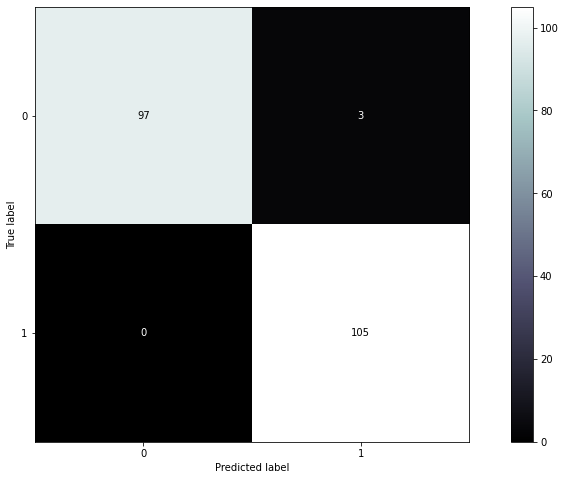

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
metrics.plot_confusion_matrix(gs_svc, X_test, y_test, cmap='bone', ax=ax);

In [15]:
print(metrics.classification_report(y_test, gs_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       100
           1       0.97      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.99       205
weighted avg       0.99      0.99      0.99       205



___

## XGBoost

In [5]:
xgb = XGBClassifier()

In [6]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [7]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
xgb.score(X_train, y_train)

1.0

In [9]:
xgb.score(X_test, y_test)

1.0

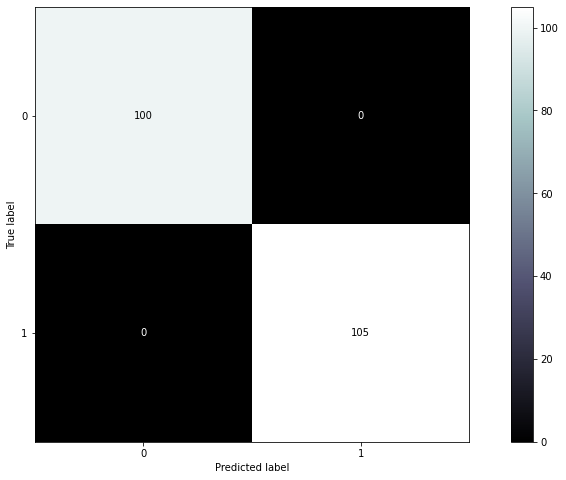

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
metrics.plot_confusion_matrix(xgb, X_test, y_test, cmap='bone', ax=ax);

In [11]:
print(metrics.classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

